In [80]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
url = "https://remoteok.com/remote-dev+data-jobs"  

headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en-US,en;q=0.9",
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

job_data = []
jobs = soup.find_all("tr", class_="job")
for job in jobs:
    title_tag = job.find("h2", itemprop="title")
    company_tag = job.find("h3", itemprop="name")
    location_tag = job.find("div", class_="location")
    tag_list = job.find_all("div", class_="tag")
    date_tag = job.find("time")
    job_link = "https://remoteok.com" + job.get("data-href", "") 

    title = title_tag.text.strip() if title_tag else "No Title"
    company = company_tag.text.strip() if company_tag else "No Company"
    location = location_tag.text.strip() if location_tag else "Remote"
    tags = ', '.join(tag.text.strip() for tag in tag_list)
    date_posted = date_tag.get("datetime") if date_tag else "Unknown"

    job_data.append({
        "Job Title": title,
        "Company": company,
        "Location": location,
        "Skills": tags,
        "Date Posted": date_posted,
        "Link": job_link
    })
df_jobs = pd.DataFrame(job_data)
df_jobs.to_csv("remoteok_jobs.csv", index=False)

print("Total jobs scraped:", len(df_jobs))
df_jobs.head()

Total jobs scraped: 11


,Job Title,Company,Location,Skills,Date Posted,Link
0,Web Developer,Contra,🌏 Worldwide,"Other, Consulting",2025-04-22T19:41:39+00:00,https://remoteok.com/remote-jobs/remote-web-de...
1,Senior Data Engineer,Soda Data,🇪🇺 Europe,Data Engineer,2025-03-10T19:29:04+00:00,https://remoteok.com/remote-jobs/remote-senior...
2,Data Warehouse Engineer,Plutus,🇪🇺 Europe,"Engineer, Backend, Front End",2024-10-11T00:00:04+00:00,https://remoteok.com/remote-jobs/remote-data-w...
3,Data Scientist & Data Engineer AI ML,Lemon.io,🇪🇺 Europe,"Engineer, Senior, Full Time, Python, English, ...",2024-02-07T12:53:37+00:00,https://remoteok.com/remote-jobs/remote-data-s...
4,Senior DataOps Engineer,Revelator,🇪🇺 Europe,DataOps,2024-01-28T08:34:20+00:00,https://remoteok.com/remote-jobs/remote-senior...


In [84]:
df_jobs.shape

(11, 6)

In [86]:
df_jobs['Skills List'] = df_jobs['Skills'].str.split(', ')

all_skills = df_jobs.explode('Skills List')['Skills List'].value_counts()

top_skills = all_skills.head(10)

In [88]:
print(top_skills)

Skills List
Deep Learning              3
AWS                        3
Engineer                   3
Backend                    3
Neural Networks            3
Artificial Intelligence    3
AI                         3
Machine Learning           3
Product                    2
Data Science               2
Name: count, dtype: int64


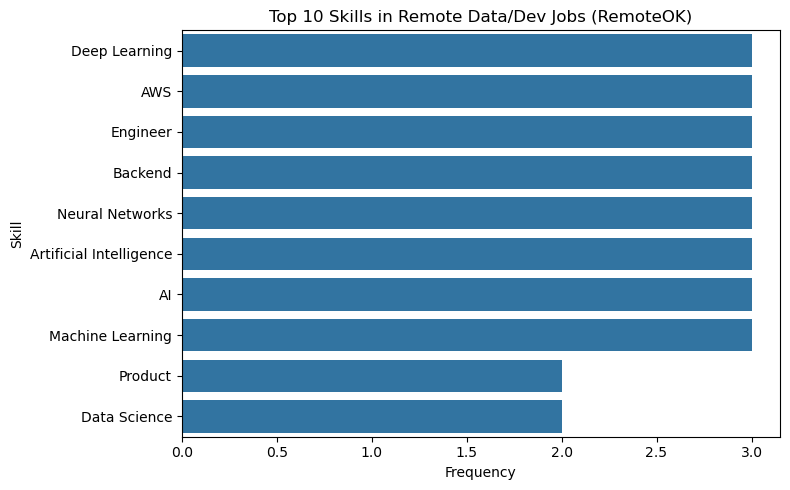

In [90]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title("Top 10 Skills in Remote Data/Dev Jobs (RemoteOK)")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

In [92]:
df_exploded = df_jobs.explode('Skills List')

# Group by Location and Skill
grouped = df_exploded.groupby(['Location', 'Skills List']).size().reset_index(name='Count')

# Pivot to make heatmap-friendly
pivot_df = grouped.pivot(index='Location', columns='Skills List', values='Count').fillna(0)

# Take top 10 skills only
top_10_skills = df_exploded['Skills List'].value_counts().head(10).index
pivot_df = pivot_df[top_10_skills]

In [108]:
# Breaks the list of skills into separate rows.
df_exploded.head(10)

,Job Title,Company,Location,Skills,Date Posted,Link,Skills List
0,Web Developer,Contra,🌏 Worldwide,"Other, Consulting",2025-04-22T19:41:39+00:00,https://remoteok.com/remote-jobs/remote-web-de...,Other
0,Web Developer,Contra,🌏 Worldwide,"Other, Consulting",2025-04-22T19:41:39+00:00,https://remoteok.com/remote-jobs/remote-web-de...,Consulting
1,Senior Data Engineer,Soda Data,🇪🇺 Europe,Data Engineer,2025-03-10T19:29:04+00:00,https://remoteok.com/remote-jobs/remote-senior...,Data Engineer
2,Data Warehouse Engineer,Plutus,🇪🇺 Europe,"Engineer, Backend, Front End",2024-10-11T00:00:04+00:00,https://remoteok.com/remote-jobs/remote-data-w...,Engineer
2,Data Warehouse Engineer,Plutus,🇪🇺 Europe,"Engineer, Backend, Front End",2024-10-11T00:00:04+00:00,https://remoteok.com/remote-jobs/remote-data-w...,Backend
2,Data Warehouse Engineer,Plutus,🇪🇺 Europe,"Engineer, Backend, Front End",2024-10-11T00:00:04+00:00,https://remoteok.com/remote-jobs/remote-data-w...,Front End
3,Data Scientist & Data Engineer AI ML,Lemon.io,🇪🇺 Europe,"Engineer, Senior, Full Time, Python, English, ...",2024-02-07T12:53:37+00:00,https://remoteok.com/remote-jobs/remote-data-s...,Engineer
3,Data Scientist & Data Engineer AI ML,Lemon.io,🇪🇺 Europe,"Engineer, Senior, Full Time, Python, English, ...",2024-02-07T12:53:37+00:00,https://remoteok.com/remote-jobs/remote-data-s...,Senior
3,Data Scientist & Data Engineer AI ML,Lemon.io,🇪🇺 Europe,"Engineer, Senior, Full Time, Python, English, ...",2024-02-07T12:53:37+00:00,https://remoteok.com/remote-jobs/remote-data-s...,Full Time
3,Data Scientist & Data Engineer AI ML,Lemon.io,🇪🇺 Europe,"Engineer, Senior, Full Time, Python, English, ...",2024-02-07T12:53:37+00:00,https://remoteok.com/remote-jobs/remote-data-s...,Python


In [106]:
# Counts how many times each skill appears per location
grouped.head(10)

,Location,Skills List,Count
0,🇪🇺 Europe,AI,1
1,🇪🇺 Europe,AWS,1
2,🇪🇺 Europe,Artificial Intelligence,1
3,🇪🇺 Europe,Azure,1
4,🇪🇺 Europe,Backend,2
5,🇪🇺 Europe,Blockchain,1
6,🇪🇺 Europe,Crypto,1
7,🇪🇺 Europe,Data Engineer,1
8,🇪🇺 Europe,Data Science,1
9,🇪🇺 Europe,DataOps,2


In [114]:
pivot_df.head(10)
# print(pivot_df)



Skills List,Deep Learning,AWS,Engineer,Backend,Neural Networks,Artificial Intelligence,AI,Machine Learning,Product,Data Science
Location,,,,,,,,,,
🇪🇺 Europe,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0
🇯🇵 Japan,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0
🌏 Worldwide,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
df_jobs['Role'] = df_jobs['Job Title'].apply(lambda x: 'Data Analyst' if 'analyst' in x.lower() else 'Developer' if 'developer' in x.lower() else 'Other')

df_matrix = df_jobs.explode('Skills List').groupby(['Role', 'Skills List']).size().unstack(fill_value=0)
print(df_matrix.head())


Skills List  AI  AWS  Algorithms  Architecture  Artificial Intelligence  \
Role                                                                      
Developer     0    0           0             0                        0   
Other         3    3           1             1                        3   

Skills List  Azure  Backend  Blockchain  Cloud  Consulting  ...  Python  SQL  \
Role                                                        ...                
Developer        0        0           0      0           1  ...       0    0   
Other            1        3           2      2           0  ...       2    1   

Skills List  Senior  Solidity  Tech  Tech Lead  Technology  Testing  \
Role                                                                  
Developer         1         0     0          0           0        0   
Other             1         1     1          1           1        1   

Skills List  Typescript  Web3  
Role                           
Developer             0     0

C:\Users\dell\OneDrive\Documents\New folder\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  fig.canvas.draw()
C:\Users\dell\OneDrive\Documents\New folder\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.draw()
C:\Users\dell\OneDrive\Documents\New folder\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127471 (\N{REGIONAL INDICATOR SYMBOL LETTER J}) missing from current font.
  fig.canvas.draw()
C:\Users\dell\OneDrive\Documents\New folder\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  fig.canvas.draw()
C:\Users\dell\OneDrive\Documents\New folder\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127759 (\N{EARTH GLOBE ASIA-AUSTRALIA}) missing from current font.
  fig.canvas.draw()
C:\Users\dell\AppData\R

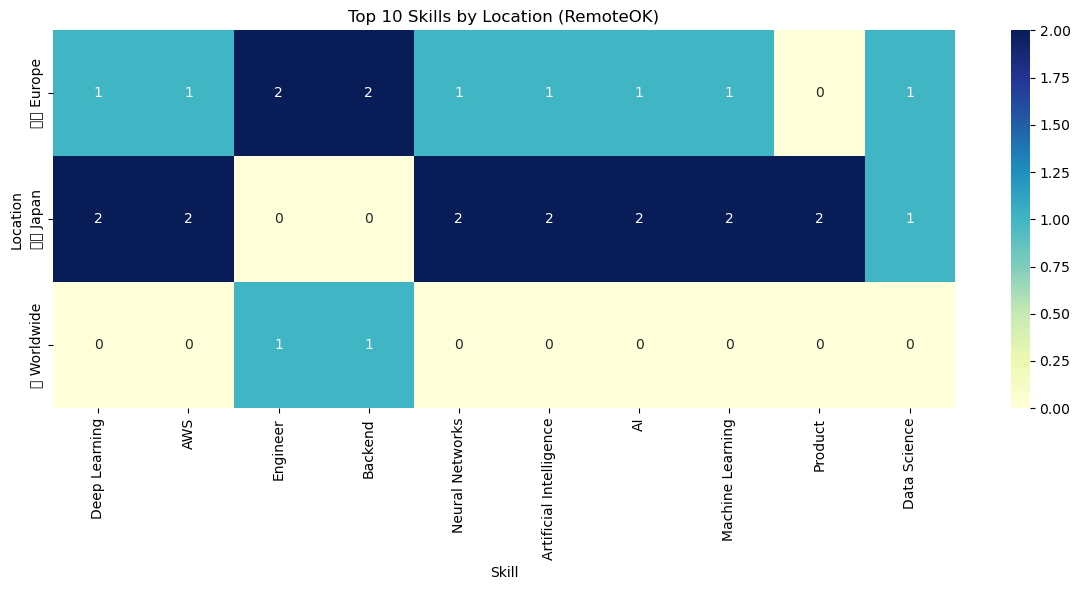

In [96]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, fmt='g', cmap="YlGnBu")
plt.title("Top 10 Skills by Location (RemoteOK)")
plt.xlabel("Skill")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

In [98]:
df_jobs.to_excel("linkedin_job_trends.xlsx", index=False)


# Summary

In [ ]:
This analysis confirms that remote job markets in 2025 are heavily oriented toward AI, Machine Learning, and Cloud skills. 
For aspiring job seekers, focusing on Python, ML tools, and cloud platforms like AWS offers a strategic advantage in landing remote tech roles.